In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [2]:
data=pd.read_csv('pinksheet.csv')

In [3]:
data.head(10)

,Unnamed: 0,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,"Coal, Colombian",Copra,Steel Index,"Steel, cold rolled coilsheet","Steel, hot rolled coilsheet",Steel rebar,Steel wire rod,"Cotton, Memphis","Rubber, US","Wheat, Canadian"
0,NaN,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,COAL_COL,COPRA,iSTL_JP_INDX,STL_JP_CROLL,STL_JP_HROLL,STL_JP_REBAR,STL_JP_WIROD,COTTON_MEMPH,RUBBER1_US,WHEAT_CANADI
1,1960M01,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,257,..,..,..,..,..,..,..,64
2,1960M02,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,248,..,..,..,..,..,..,..,64.09
3,1960M03,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,236,..,..,..,..,..,..,..,63.76
4,1960M04,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,214,..,..,..,..,..,..,..,63.35
5,1960M05,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,206,..,..,..,..,..,..,..,63.11
6,1960M06,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,189,..,..,..,..,..,..,..,62.84
7,1960M07,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,189,..,..,..,..,..,..,..,62.72
8,1960M08,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,188,..,..,..,..,..,..,..,62.52
9,1960M09,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,173,..,..,..,..,..,..,..,62.34


In [46]:
data1=data[1:721]
data2=data1[['Unnamed: 0','Cocoa']]
data2=data2.rename(columns={"Unnamed: 0":"date",
                           "Cocoa":"cocoa"})
data2['date']=data2['date'].str.replace("M","-")
data2['date']=pd.to_datetime(data2.date,format='%Y-%m')
data2.head(10)

,date,cocoa
1,1960-01-01,0.63
2,1960-02-01,0.61
3,1960-03-01,0.58
4,1960-04-01,0.6
5,1960-05-01,0.6
6,1960-06-01,0.59
7,1960-07-01,0.6
8,1960-08-01,0.59
9,1960-09-01,0.58
10,1960-10-01,0.59


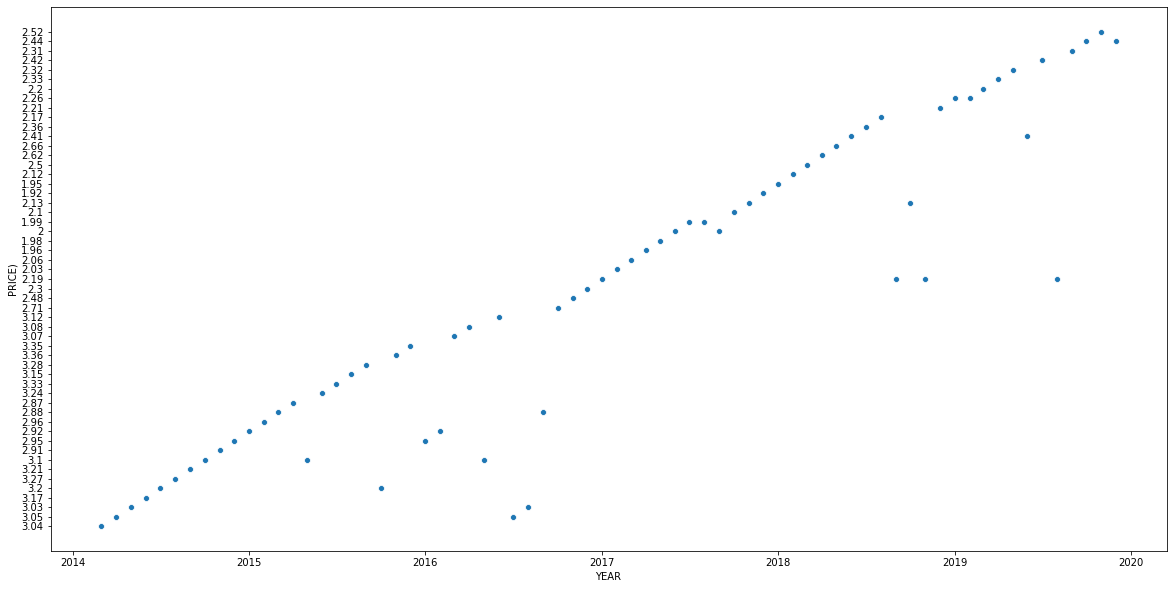

In [47]:
plt.figure(figsize=[20,10])
sns.scatterplot(data=data2[650:],x='date',y='cocoa')
plt.xlabel("YEAR")
plt.ylabel('PRICE)')
plt.show()

In [11]:
x=np.asmatrix(data2['date']).reshape(-1,1)
y=np.asmatrix(data2['cocoa']).reshape(-1,1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
lr=LinearRegression()
pre=lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
mean_squared_error(y_test,pred_lr)

0.5579670049690996

In [14]:
rfr=RandomForestRegressor(n_estimators=250,max_depth=8,random_state=1111)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
mean_squared_error(pred_rfr,y_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.015512848746674714

In [15]:
x_train.shape

(576, 1)

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

Using TensorFlow backend.


In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.asmatrix(data2['date']).reshape(-1,1),np.asmatrix(data2['cocoa']).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
data3=[731]
pre=lr.predict(np.asmatrix(data3).reshape(-1,1))
from sklearn.metrics import mean_squared_error

In [54]:
data2['date'][650:]

651   2014-03-01
652   2014-04-01
653   2014-05-01
654   2014-06-01
655   2014-07-01
         ...    
716   2019-08-01
717   2019-09-01
718   2019-10-01
719   2019-11-01
720   2019-12-01
Name: date, Length: 70, dtype: datetime64[ns]